# 1.3 Analiza in vizualizacija podatkov o molekulah

In [1]:
%run __A_knjiznice.py
from __A_knjiznice import *
from __C_konstante import *

%matplotlib inline

/Users/samonose/PycharmProjects/IDO_inhibitors_ML_predictions/dir1
/Users/samonose/PycharmProjects/IDO_inhibitors_ML_predictions/dir1


V [2] vnesemo združene podatakte s podatkovnih baz ChEMBL in BindingDB. Namen je pregled podatkov pred izključitvami. 

In [2]:
molecules = pd.read_csv(f'{path_files}/joined_df.csv')
molecules

,smiles,IC50,pIC50,ROMol,target_organism
0,O=C1c2cc([N+](=O)[O-])ccc2-n2c1nc1ccccc1c2=O,0.018,10.744727,<rdkit.Chem.rdchem.Mol object at 0x16fce49e0>,Homo sapiens
1,Cc1cc(C2CC2)ncc1-c1ccc(C2(C(=O)Nc3ccc(F)cc3)CO...,0.080,10.096910,<rdkit.Chem.rdchem.Mol object at 0x16fcb09e0>,Homo sapiens
2,O=C(Nc1ccc(C2(C(=O)Nc3ccc(F)cc3)COC2)cc1)c1ccc...,0.090,10.045757,<rdkit.Chem.rdchem.Mol object at 0x16fcdcba0>,Homo sapiens
3,O=C(Nc1ccc(F)cc1)C1(C2CCC3C(CCCN3c3ccnc(C(F)(F...,0.100,10.000000,<rdkit.Chem.rdchem.Mol object at 0x16fcddcb0>,Homo sapiens
4,O=C1CC(c2c[nH]c3ccc(F)cc23)C(=O)N1,0.120,9.920819,<rdkit.Chem.rdchem.Mol object at 0x16fce25e0>,Homo sapiens
...,...,...,...,...,...
4286,FC(F)(F)c1ccc(-c2c[nH]nn2)cc1,2300000.000,2.638272,<rdkit.Chem.rdchem.Mol object at 0x16fcbef10>,Homo sapiens
4287,c1ccc2[nH]nnc2c1,2570000.000,2.590067,<rdkit.Chem.rdchem.Mol object at 0x16fcf54d0>,Homo sapiens
4288,Cc1cccc(NC(=O)C(F)(F)F)c1-c1c[nH]nn1,3000000.000,2.522879,<rdkit.Chem.rdchem.Mol object at 0x16fcb5230>,Homo sapiens
4289,Cc1ccc(N)cc1-c1c[nH]nn1,3200000.000,2.494850,<rdkit.Chem.rdchem.Mol object at 0x16fcb2500>,Homo sapiens


In [3]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

molecules_analysis = molecules.copy()

# Define the function to calculate specific property
def calc_property(smiles, param):
    mol = Chem.MolFromSmiles(smiles)
    if mol:  # Check if molecule was successfully created
        if param == 'Molekulska_masa':
            return Descriptors.MolWt(mol)  # Molecular Weight
        elif param == 'logP':
            return Descriptors.MolLogP(mol)  # LogP
        elif param == 'Število_O_atomov':
            return sum(1 for atom in mol.GetAtoms() if atom.GetSymbol() == 'O')  # Oxygen count
        elif param == 'Število_N_atomov':
            return sum(1 for atom in mol.GetAtoms() if atom.GetSymbol() == 'N')  # Nitrogen count
        elif param == 'Akceptorji_H_vezi':
            return rdMolDescriptors.CalcNumHBA(mol)  # Hydrogen Bond Acceptors
        elif param == 'Donorji_H_vezi':
            return rdMolDescriptors.CalcNumHBD(mol)  # Hydrogen Bond Donors
        elif param == 'Število_aromatskih_obročev':
            return rdMolDescriptors.CalcNumAromaticRings(mol)  # Aromatic Rings
        elif param == 'TPSA':
            return rdMolDescriptors.CalcTPSA(mol)  # Topological Polar Surface Area
        elif param == 'Število_rotirajočih_vezi':
            return Descriptors.NumRotatableBonds(mol)  # Number of Rotatable 
        else:
            return None  # Return None for unsupported params
    else:
        return None  # Return None if the molecule is invalid

# Example: Assuming 'molecules' is your DataFrame with 'smiles' column
# molecules = pd.read_csv('your_file.csv')  # If you're loading the data

# List of properties to calculate and add to DataFrame
properties = ['Molekulska_masa', 'logP', 'Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 'Donorji_H_vezi','Število_aromatskih_obročev','TPSA','Število_rotirajočih_vezi']

# Apply the function to each property and add the result as a new column
for prop in properties:
    molecules_analysis[prop] = molecules['smiles'].apply(lambda x: calc_property(x, prop))

molecules_analysis

,smiles,IC50,pIC50,ROMol,target_organism,Molekulska_masa,logP,Število_O_atomov,Število_N_atomov,Akceptorji_H_vezi,Donorji_H_vezi,Število_aromatskih_obročev,TPSA,Število_rotirajočih_vezi
0,O=C1c2cc([N+](=O)[O-])ccc2-n2c1nc1ccccc1c2=O,0.018,10.744727,<rdkit.Chem.rdchem.Mol object at 0x16fce49e0>,Homo sapiens,293.238,1.83830,4,3,6,0,3,95.10,1
1,Cc1cc(C2CC2)ncc1-c1ccc(C2(C(=O)Nc3ccc(F)cc3)CO...,0.080,10.096910,<rdkit.Chem.rdchem.Mol object at 0x16fcb09e0>,Homo sapiens,402.469,4.98022,2,2,3,1,3,51.22,5
2,O=C(Nc1ccc(C2(C(=O)Nc3ccc(F)cc3)COC2)cc1)c1ccc...,0.090,10.045757,<rdkit.Chem.rdchem.Mol object at 0x16fcdcba0>,Homo sapiens,424.859,4.63810,3,2,3,2,3,67.43,5
3,O=C(Nc1ccc(F)cc1)C1(C2CCC3C(CCCN3c3ccnc(C(F)(F...,0.100,10.000000,<rdkit.Chem.rdchem.Mol object at 0x16fcddcb0>,Homo sapiens,476.518,5.82860,1,4,4,1,2,58.12,4
4,O=C1CC(c2c[nH]c3ccc(F)cc23)C(=O)N1,0.120,9.920819,<rdkit.Chem.rdchem.Mol object at 0x16fce25e0>,Homo sapiens,232.214,1.43710,2,2,2,2,2,61.96,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4286,FC(F)(F)c1ccc(-c2c[nH]nn2)cc1,2300000.000,2.638272,<rdkit.Chem.rdchem.Mol object at 0x16fcbef10>,Homo sapiens,213.162,2.49050,0,3,2,1,2,41.57,1
4287,c1ccc2[nH]nnc2c1,2570000.000,2.590067,<rdkit.Chem.rdchem.Mol object at 0x16fcf54d0>,Homo sapiens,119.127,0.95790,0,3,2,1,2,41.57,0
4288,Cc1cccc(NC(=O)C(F)(F)F)c1-c1c[nH]nn1,3000000.000,2.522879,<rdkit.Chem.rdchem.Mol object at 0x16fcb5230>,Homo sapiens,270.214,2.28092,1,4,3,2,2,70.67,2
4289,Cc1ccc(N)cc1-c1c[nH]nn1,3200000.000,2.494850,<rdkit.Chem.rdchem.Mol object at 0x16fcb2500>,Homo sapiens,174.207,1.36232,0,4,3,2,2,67.59,1


In [4]:
# Assuming you have already calculated the statistics
MW_stats = molecules_analysis['Molekulska_masa'].describe()
logP_stats = molecules_analysis['logP'].describe()
Aromatic_Rings_stats = molecules_analysis['Število_aromatskih_obročev'].describe()
HBA_stats = molecules_analysis['Akceptorji_H_vezi'].describe()
HBD_stats = molecules_analysis['Donorji_H_vezi'].describe()
O_Count_stats = molecules_analysis['Število_O_atomov'].describe()
N_Count_stats = molecules_analysis['Število_N_atomov'].describe()
pIC50_stats = molecules_analysis['pIC50'].describe()

# Create a DataFrame to hold the statistics
stats_df = pd.DataFrame({
    'Molekulska_masa': MW_stats,
    'logP': logP_stats,
    'Število_aromatskih_obročev': Aromatic_Rings_stats,
    'Akceptorji_H_vezi': HBA_stats,
    'Donorji_H_vezi': HBD_stats,
    'Število_O_atomov': O_Count_stats,
    'Število_N_atomov': N_Count_stats,
    'pIC50': pIC50_stats
})

# Transpose the DataFrame to have the statistics as rows
stats_df = stats_df.transpose()
stats_df

,count,mean,std,min,25%,50%,75%,max
Molekulska_masa,4291.0,364.313525,98.680366,108.144000,294.97350,365.723000,428.326000,966.816000
logP,4291.0,3.369356,1.786867,-2.109690,2.02338,3.332720,4.541300,9.545700
Število_aromatskih_obročev,4291.0,2.572128,0.830147,0.000000,2.00000,2.000000,3.000000,5.000000
Akceptorji_H_vezi,4291.0,4.883011,2.191596,1.000000,3.00000,4.000000,6.000000,19.000000
Donorji_H_vezi,4291.0,2.021673,1.307231,0.000000,1.00000,2.000000,3.000000,7.000000
Število_O_atomov,4291.0,2.359823,1.620414,0.000000,1.00000,2.000000,3.000000,13.000000
Število_N_atomov,4291.0,3.503845,1.750304,0.000000,2.00000,3.000000,5.000000,10.000000
pIC50,4291.0,6.252980,1.299802,2.221849,5.30103,6.420216,7.136677,10.744727


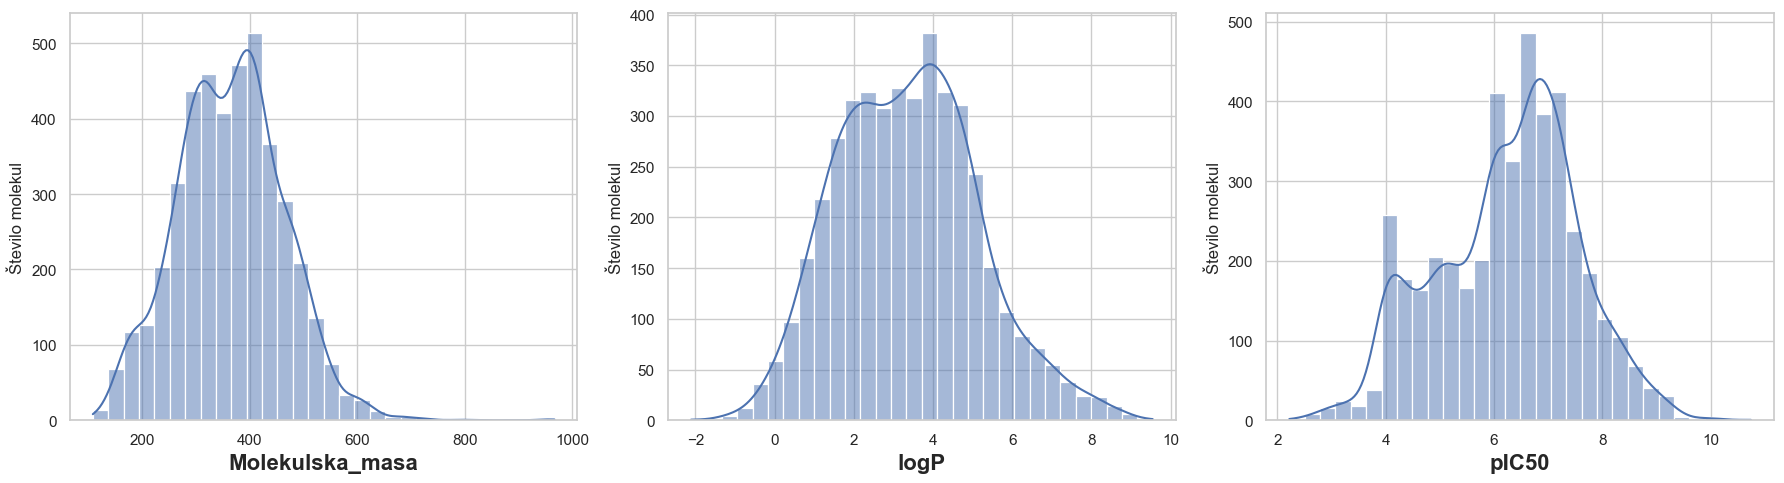

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'pIC50' is already calculated and included in the molecules_analysis DataFrame
# If not, you would need to calculate it similarly to the other properties.

# List of continuous properties to visualize
continuous_properties = ['Molekulska_masa', 'logP', 'pIC50']

# properties = ['Molekulska_masa', 'logP', 'Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 'Donorji_H_vezi','Število_aromatskih_obročev','TPSA','Število_rotirajočih_vezi']
# List of discrete properties to visualize
discrete_properties = ['Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 'Donorji_H_vezi', 'Število_aromatskih_obročev', 'Število_rotirajočih_vezi']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with subplots for continuous properties
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_properties), figsize=(18, 5))

# Loop through each continuous property and create a histogram
for i, prop in enumerate(continuous_properties):
    sns.histplot(molecules_analysis[prop].dropna(), bins=30, kde=True, ax=axes[i])
    # axes[i].set_title(f'{prop}')
    axes[i].set_xlabel(prop,fontsize=16, fontweight='bold')
    axes[i].set_ylabel('Število molekul')

# Adjust layout for continuous properties
plt.tight_layout()
plt.show()

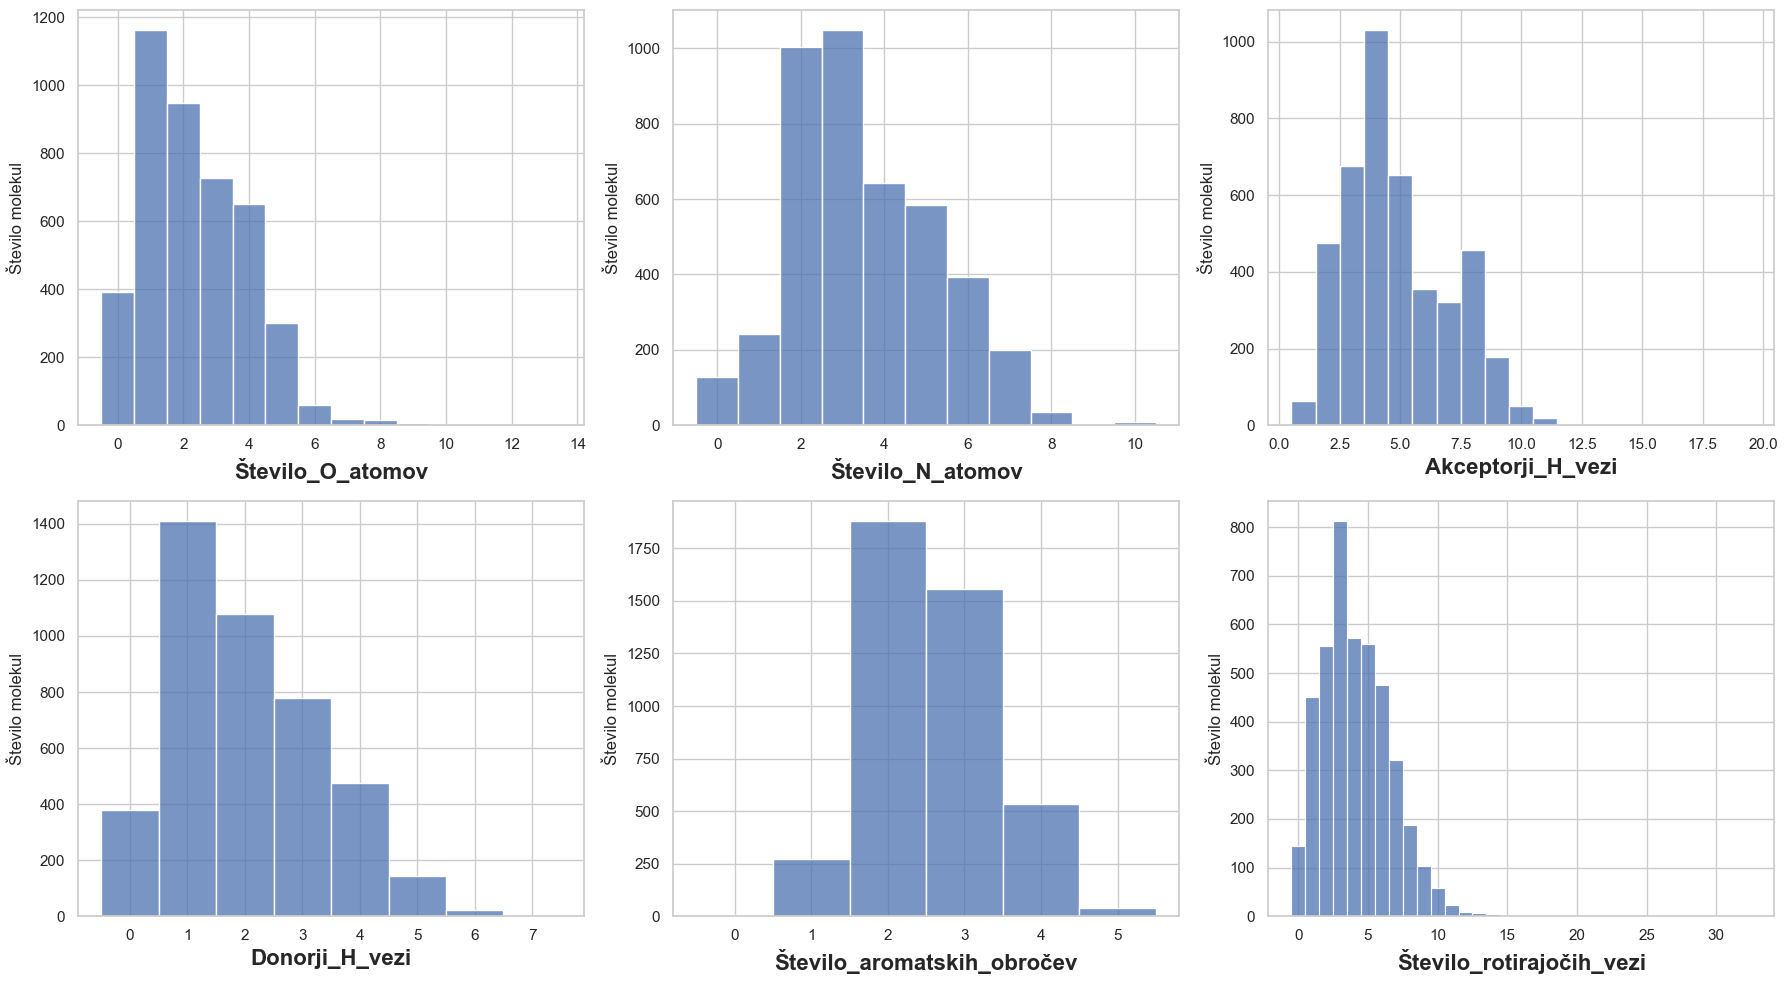

In [6]:
# Create a figure with subplots for discrete properties
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each discrete property and create a histogram
for i, prop in enumerate(discrete_properties):
    sns.histplot(molecules_analysis[prop].dropna(), bins=molecules_analysis[prop].nunique(), discrete=True, ax=axes[i])
    # axes[i].set_title(f'Razporeditev {prop}')
    axes[i].set_xlabel(prop,fontsize=16, fontweight='bold')
    axes[i].set_ylabel('Število molekul')

# Remove any empty subplots if there are less than 6 properties
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for discrete properties
plt.tight_layout()
plt.show()

# Pains

In [7]:
params = FilterCatalogParams()
params.AddCatalog(FilterCatalogParams.FilterCatalogs.PAINS)
catalog = FilterCatalog(params)

def check_for_pains(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        alerts = catalog.GetMatches(mol)
        if alerts:
            return [alert.GetDescription() for alert in alerts]
    return []

# Apply the function to the "smiles" column and create a new column "pains_alerts"
molecules['pains_alerts'] = molecules['smiles'].apply(check_for_pains)



molecules_with_pains = molecules[molecules['pains_alerts'].apply(lambda x: len(x) > 0)]

In [8]:
molecules_with_pains

,smiles,IC50,pIC50,ROMol,target_organism,pains_alerts
46,O=C1c2nnn(Cc3ccccc3)c2C(=O)c2nnn(Cc3ccccc3)c21,1.0,9.000000,<rdkit.Chem.rdchem.Mol object at 0x16fce69d0>,Homo sapiens,[quinone_A(370)]
151,CC1=C(CC(=O)c2sccc2Br)C(=O)c2ccccc2C1=O,3.4,8.468521,<rdkit.Chem.rdchem.Mol object at 0x16fc8f3e0>,Homo sapiens,[quinone_A(370)]
194,O=C1c2cc(F)ccc2C(=O)c2c1nnn2-c1ccc(F)c(Cl)c1,5.0,8.301030,<rdkit.Chem.rdchem.Mol object at 0x16fce47b0>,Homo sapiens,[quinone_A(370)]
328,O=C1c2ccc(F)cc2C(=O)c2c1nnn2-c1ccc(F)c(Cl)c1,10.0,8.000000,<rdkit.Chem.rdchem.Mol object at 0x16fce4b30>,Homo sapiens,[quinone_A(370)]
388,O=C1c2ccccc2C(=O)c2c1nnn2-c1ccc(F)c(Cl)c1,13.0,7.886057,<rdkit.Chem.rdchem.Mol object at 0x16fce57e0>,Homo sapiens,[quinone_A(370)]
...,...,...,...,...,...,...
4201,C[C@@H]1c2[nH]c3ccccc3c2C[C@H]2C(=O)N(C)C(=S)N12,174600.0,3.757956,<rdkit.Chem.rdchem.Mol object at 0x16fcacc80>,Homo sapiens,[indol_3yl_alk(461)]
4202,C[C@@H]1c2[nH]c3ccccc3c2Cc2c(O)n(C)c(=S)n21,174600.0,3.757956,<rdkit.Chem.rdchem.Mol object at 0x16fcaccf0>,Homo sapiens,[indol_3yl_alk(461)]
4239,Nc1ccc(Nc2ccccc2)cc1,400000.0,3.397940,<rdkit.Chem.rdchem.Mol object at 0x16fccc5f0>,Homo sapiens,[anil_no_alk(40)]
4256,O=C1CC(=O)c2ccccc2C1=O,675000.0,3.170696,<rdkit.Chem.rdchem.Mol object at 0x16fce2110>,Homo sapiens,"[imine_one_A(321), keto_keto_gamma(5)]"


In [9]:
import pandas as pd

# Filter molecules with PAINS alerts
molecules_with_pains = molecules[molecules['pains_alerts'].apply(lambda x: len(x) > 0)]

# Convert the list of alerts into a frozenset for unique grouping
molecules_with_pains['alert_group'] = molecules_with_pains['pains_alerts'].apply(frozenset)

# Count the occurrences of each unique alert group
group_counts = molecules_with_pains['alert_group'].value_counts()

# Convert to a DataFrame for better visualization
group_counts_df = group_counts.reset_index()
group_counts_df.columns = ['Alert Group', 'Count']

# Sort by count (optional)
group_counts_df.sort_values(by='Count', ascending=False, inplace=True)

# Format the alert group as strings for easier reading
group_counts_df['Alert Group'] = group_counts_df['Alert Group'].apply(lambda x: ', '.join(sorted(x)))

# Display the grouped counts
print(group_counts_df)

                             Alert Group  Count
0                         quinone_A(370)    319
1         imine_one_A(321), quinone_D(2)     36
2                     indol_3yl_alk(461)     25
3                    hzone_phenol_A(479)     13
4                  imine_one_isatin(189)      6
5                     anil_di_alk_C(246)      6
6                     anil_di_alk_B(251)      5
7                             azo_A(324)      4
8                         catechol_A(92)      4
11                    anil_di_alk_A(478)      3
9                         mannich_A(296)      3
10       ene_one_hal(17), quinone_A(370)      3
12                       ene_cyano_A(19)      2
13                    keto_keto_gamma(5)      1
14                    anil_di_alk_E(186)      1
15    anil_di_alk_A(478), quinone_A(370)      1
16                      imine_imine_A(9)      1
17                       anil_no_alk(40)      1
18  imine_one_A(321), keto_keto_gamma(5)      1


/var/folders/fn/v7kdx_6j0gv8rm308v5x0m4h0000gn/T/ipykernel_6299/2694196845.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  molecules_with_pains['alert_group'] = molecules_with_pains['pains_alerts'].apply(frozenset)


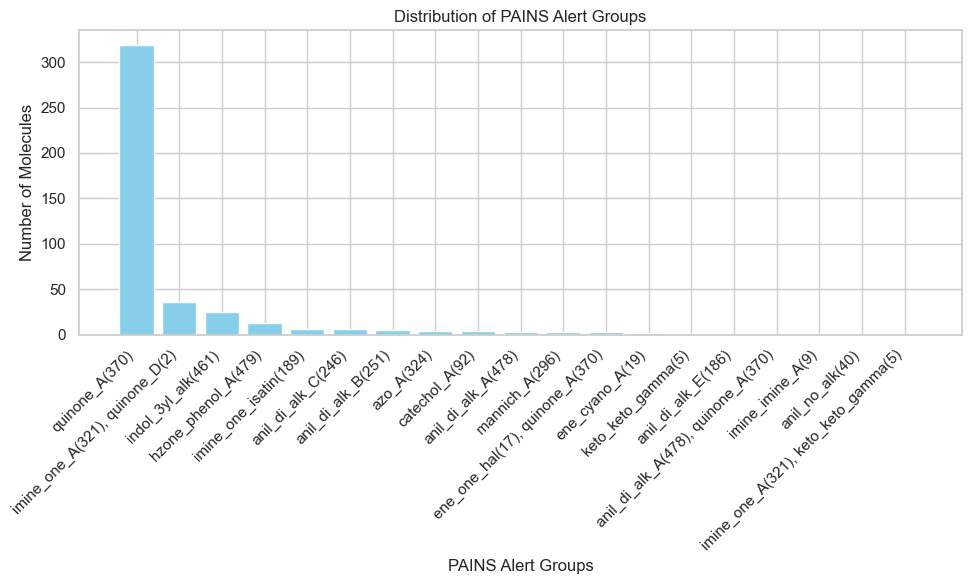

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(group_counts_df['Alert Group'], group_counts_df['Count'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('PAINS Alert Groups')
plt.ylabel('Number of Molecules')
plt.title('Distribution of PAINS Alert Groups')
plt.tight_layout()
plt.show()


# Pregled lastnosti aktivnih in neaktivnih molekul

Vpeljemo molekule z izključitvami in opredeljeno aktivnostjo, da pregledamo fizikalno kemijske lastnosti.

In [11]:
molecules_w_exclusions = pd.read_csv('dp.csv')
molecules_w_exclusions

,Smiles,ROMol,Activity
0,O=C1c2cc([N+](=O)[O-])ccc2-n2c1nc1ccccc1c2=O,<rdkit.Chem.rdchem.Mol object at 0x16fce49e0>,1
1,Cc1cc(C2CC2)ncc1-c1ccc(C2(C(=O)Nc3ccc(F)cc3)CO...,<rdkit.Chem.rdchem.Mol object at 0x16fcb09e0>,1
2,O=C(Nc1ccc(C2(C(=O)Nc3ccc(F)cc3)COC2)cc1)c1ccc...,<rdkit.Chem.rdchem.Mol object at 0x16fcdcba0>,1
3,O=C(Nc1ccc(F)cc1)C1(C2CCC3C(CCCN3c3ccnc(C(F)(F...,<rdkit.Chem.rdchem.Mol object at 0x16fcddcb0>,1
4,O=C1CC(c2c[nH]c3ccc(F)cc23)C(=O)N1,<rdkit.Chem.rdchem.Mol object at 0x16fce25e0>,1
...,...,...,...
4137,FC(F)(F)c1ccc(-c2c[nH]nn2)cc1,<rdkit.Chem.rdchem.Mol object at 0x16fcbef10>,0
4138,c1ccc2[nH]nnc2c1,<rdkit.Chem.rdchem.Mol object at 0x16fcf54d0>,0
4139,Cc1cccc(NC(=O)C(F)(F)F)c1-c1c[nH]nn1,<rdkit.Chem.rdchem.Mol object at 0x16fcb5230>,0
4140,Cc1ccc(N)cc1-c1c[nH]nn1,<rdkit.Chem.rdchem.Mol object at 0x16fcb2500>,0


In [12]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

molecules_w_exclusions_analysis = molecules_w_exclusions.copy()

molecules_w_exclusions_analysis.rename(columns={'Activity': 'Aktivnost'}, inplace = True)

continuous_properties = ['Molekulska_masa', 'logP', 'pIC50']

# properties = ['Molekulska_masa', 'logP', 'Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 'Donorji_H_vezi','Število_aromatskih_obročev','TPSA','Število_rotirajočih_vezi']
# List of discrete properties to visualize
discrete_properties = ['Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 'Donorji_H_vezi', 'Število_aromatskih_obročev', 'Število_rotirajočih_vezi']


# Apply the function to each property and add the result as a new column
for prop in properties:
    molecules_w_exclusions_analysis[prop] = molecules_w_exclusions_analysis['Smiles'].apply(lambda x: calc_property(x, prop))

molecules_w_exclusions_analysis

,Smiles,ROMol,Aktivnost,Molekulska_masa,logP,Število_O_atomov,Število_N_atomov,Akceptorji_H_vezi,Donorji_H_vezi,Število_aromatskih_obročev,TPSA,Število_rotirajočih_vezi
0,O=C1c2cc([N+](=O)[O-])ccc2-n2c1nc1ccccc1c2=O,<rdkit.Chem.rdchem.Mol object at 0x16fce49e0>,1,293.238,1.83830,4,3,6,0,3,95.10,1
1,Cc1cc(C2CC2)ncc1-c1ccc(C2(C(=O)Nc3ccc(F)cc3)CO...,<rdkit.Chem.rdchem.Mol object at 0x16fcb09e0>,1,402.469,4.98022,2,2,3,1,3,51.22,5
2,O=C(Nc1ccc(C2(C(=O)Nc3ccc(F)cc3)COC2)cc1)c1ccc...,<rdkit.Chem.rdchem.Mol object at 0x16fcdcba0>,1,424.859,4.63810,3,2,3,2,3,67.43,5
3,O=C(Nc1ccc(F)cc1)C1(C2CCC3C(CCCN3c3ccnc(C(F)(F...,<rdkit.Chem.rdchem.Mol object at 0x16fcddcb0>,1,476.518,5.82860,1,4,4,1,2,58.12,4
4,O=C1CC(c2c[nH]c3ccc(F)cc23)C(=O)N1,<rdkit.Chem.rdchem.Mol object at 0x16fce25e0>,1,232.214,1.43710,2,2,2,2,2,61.96,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4137,FC(F)(F)c1ccc(-c2c[nH]nn2)cc1,<rdkit.Chem.rdchem.Mol object at 0x16fcbef10>,0,213.162,2.49050,0,3,2,1,2,41.57,1
4138,c1ccc2[nH]nnc2c1,<rdkit.Chem.rdchem.Mol object at 0x16fcf54d0>,0,119.127,0.95790,0,3,2,1,2,41.57,0
4139,Cc1cccc(NC(=O)C(F)(F)F)c1-c1c[nH]nn1,<rdkit.Chem.rdchem.Mol object at 0x16fcb5230>,0,270.214,2.28092,1,4,3,2,2,70.67,2
4140,Cc1ccc(N)cc1-c1c[nH]nn1,<rdkit.Chem.rdchem.Mol object at 0x16fcb2500>,0,174.207,1.36232,0,4,3,2,2,67.59,1


In [13]:
import pandas as pd

# Assuming molecules_w_exclusions_analysis is your DataFrame
# Filter the DataFrame for active and inactive molecules
active_molecules = molecules_w_exclusions_analysis[molecules_w_exclusions_analysis['Aktivnost'] == 1]
inactive_molecules = molecules_w_exclusions_analysis[molecules_w_exclusions_analysis['Aktivnost'] == 0]

# Calculate statistics for active molecules
MW_stats_active = active_molecules['Molekulska_masa'].describe()
logP_stats_active = active_molecules['logP'].describe()
Aromatic_Rings_stats_active = active_molecules['Število_aromatskih_obročev'].describe()
HBA_stats_active = active_molecules['Akceptorji_H_vezi'].describe()
HBD_stats_active = active_molecules['Donorji_H_vezi'].describe()
O_Count_stats_active = active_molecules['Število_O_atomov'].describe()
N_Count_stats_active = active_molecules['Število_N_atomov'].describe()

# Create a DataFrame for active statistics
active_stats_df = pd.DataFrame({
    'Molekulska_masa': MW_stats_active,
    'logP': logP_stats_active,
    'Število_aromatskih_obročev': Aromatic_Rings_stats_active,
    'Akceptorji_H_vezi': HBA_stats_active,
    'Donorji_H_vezi': HBD_stats_active,
    'Število_O_atomov': O_Count_stats_active,
    'Število_N_atomov': N_Count_stats_active
})

# Transpose the DataFrame to have the statistics as rows
active_stats_df = active_stats_df.transpose()

# Calculate statistics for inactive molecules
MW_stats_inactive = inactive_molecules['Molekulska_masa'].describe()
logP_stats_inactive = inactive_molecules['logP'].describe()
Aromatic_Rings_stats_inactive = inactive_molecules['Število_aromatskih_obročev'].describe()
HBA_stats_inactive = inactive_molecules['Akceptorji_H_vezi'].describe()
HBD_stats_inactive = inactive_molecules['Donorji_H_vezi'].describe()
O_Count_stats_inactive = inactive_molecules['Število_O_atomov'].describe()
N_Count_stats_inactive = inactive_molecules['Število_N_atomov'].describe()

# Create a DataFrame for inactive statistics
inactive_stats_df = pd.DataFrame({
    'Molekulska_masa': MW_stats_inactive,
    'logP': logP_stats_inactive,
    'Število_aromatskih_obročev': Aromatic_Rings_stats_inactive,
    'Akceptorji_H_vezi': HBA_stats_inactive,
    'Donorji_H_vezi': HBD_stats_inactive,
    'Število_O_atomov': O_Count_stats_inactive,
    'Število_N_atomov': N_Count_stats_inactive
})

# Transpose the DataFrame to have the statistics as rows
inactive_stats_df = inactive_stats_df.transpose()

In [14]:
active_stats_df

,count,mean,std,min,25%,50%,75%,max
Molekulska_masa,2103.0,401.174511,79.208688,108.1440,347.2390,405.47300,455.65650,690.2160
logP,2103.0,3.464503,1.940915,-1.0459,1.8925,3.61498,4.80656,9.5457
Število_aromatskih_obročev,2103.0,2.598669,0.783778,0.0000,2.0000,2.00000,3.00000,5.0000
Akceptorji_H_vezi,2103.0,5.634332,2.215313,1.0000,4.0000,5.00000,8.00000,15.0000
Donorji_H_vezi,2103.0,2.406087,1.371381,0.0000,1.0000,2.00000,3.00000,7.0000
Število_O_atomov,2103.0,2.526866,1.475172,0.0000,1.0000,2.00000,4.00000,11.0000
Število_N_atomov,2103.0,4.233000,1.753592,0.0000,3.0000,4.00000,6.00000,10.0000


In [15]:
inactive_stats_df

,count,mean,std,min,25%,50%,75%,max
Molekulska_masa,2039.0,325.203618,100.663996,109.12800,257.7820,317.3910,381.4250,966.816
logP,2039.0,3.319450,1.643080,-2.10969,2.1535,3.2471,4.3341,9.101
Število_aromatskih_obročev,2039.0,2.544385,0.872020,0.00000,2.0000,3.0000,3.0000,5.000
Akceptorji_H_vezi,2039.0,4.059833,1.905869,1.00000,3.0000,4.0000,5.0000,19.000
Donorji_H_vezi,2039.0,1.688573,1.119294,0.00000,1.0000,2.0000,2.0000,6.000
Število_O_atomov,2039.0,2.087298,1.687927,0.00000,1.0000,2.0000,3.0000,13.000
Število_N_atomov,2039.0,2.818538,1.425765,0.00000,2.0000,3.0000,4.0000,10.000


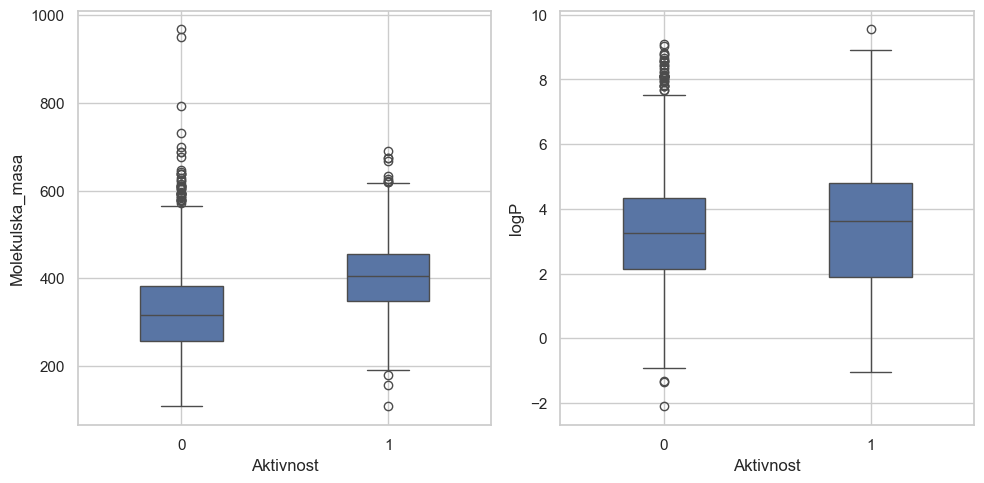

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming molecules_w_exclusions_analysis is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create box plots for each measure
measures = ['Molekulska_masa', 'logP']

# Create a figure with subplots (2 columns)
fig, axes = plt.subplots(nrows=1, ncols=len(measures), figsize=(10, 5))  # Adjusted figure size

for ax, measure in zip(axes, measures):
    sns.boxplot(x='Aktivnost', y=measure, data=molecules_w_exclusions_analysis, ax=ax, width=0.4)  # Adjusted box width
    #ax.set_title(f'Škatlasti diagram vrednosti: {measure}', fontsize=14)
    ax.set_xlabel('Aktivnost', fontsize=12)
    ax.set_ylabel(measure, fontsize=12)
    ax.grid(True)

plt.tight_layout()
plt.show()

In [17]:
import pandas as pd

# Define the criteria for Lipinski's Rule of Five
def check_lipinski(row):
    # Check each criterion and return 1 if all are met, otherwise return 0
    return int(
        row['Molekulska_masa'] < 500 and
        row['logP'] < 5 and
        row['Akceptorji_H_vezi'] <= 10 and
        row['Donorji_H_vezi'] <= 5 and
        row.get('Rotatable_Bonds', 0) <= 10  # Assuming you have a column for rotatable bonds
    )

# Apply the function to both active and inactive DataFrames
active_lipinski_compliance = active_molecules.apply(check_lipinski, axis=1)
inactive_lipinski_compliance = inactive_molecules.apply(check_lipinski, axis=1)

# Count compliant molecules
active_compliant_count = active_lipinski_compliance.sum()
inactive_compliant_count = inactive_lipinski_compliance.sum()

# Count non-compliant molecules
active_non_compliant_count = len(active_lipinski_compliance) - active_compliant_count
inactive_non_compliant_count = len(inactive_lipinski_compliance) - inactive_compliant_count

# Print results
print("Active Molecules Compliance with Lipinski's Rule of Five:")
print(f"Compliant: {active_compliant_count}, Non-Compliant: {active_non_compliant_count}")

print("\nInactive Molecules Compliance with Lipinski's Rule of Five:")
print(f"Compliant: {inactive_compliant_count}, Non-Compliant: {inactive_non_compliant_count}")

Active Molecules Compliance with Lipinski's Rule of Five:
Compliant: 1516, Non-Compliant: 587

Inactive Molecules Compliance with Lipinski's Rule of Five:
Compliant: 1712, Non-Compliant: 327


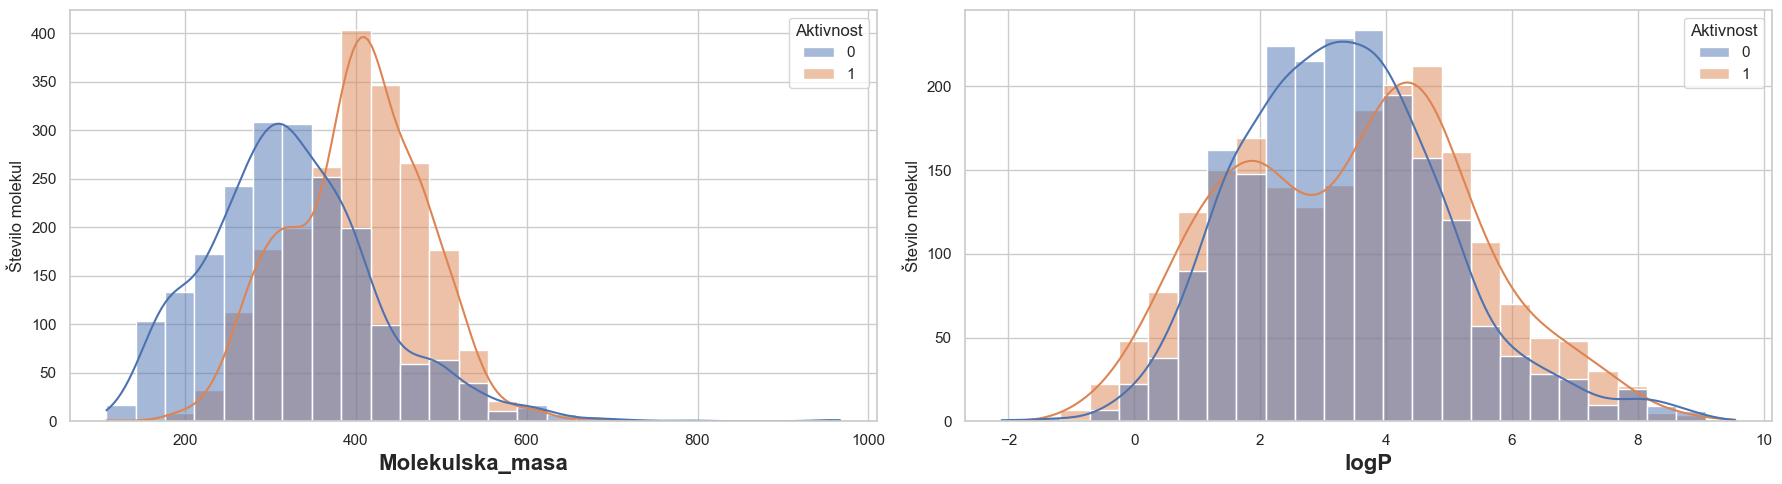

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'pIC50' is already calculated and included in the molecules_analysis DataFrame
# If not, you would need to calculate it similarly to the other properties.

# List of continuous properties to visualize
continuous_properties = ['Molekulska_masa', 'logP']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with subplots for continuous properties
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_properties), figsize=(18, 5))

# Loop through each continuous property and create a histogram
for i, prop in enumerate(continuous_properties):
    sns.histplot(data=molecules_w_exclusions_analysis, x=prop, hue='Aktivnost', bins=25, kde=True, ax=axes[i]) # multiple="dodge"
    axes[i].set_xlabel(prop, fontsize=16, fontweight='bold')
    axes[i].set_ylabel('Število molekul')
    #axes[i].set_title(f'Razporezditev vrednosti  {prop}', fontsize=18, fontweight='bold')

# Adjust layout for continuous properties
plt.tight_layout()
plt.show()


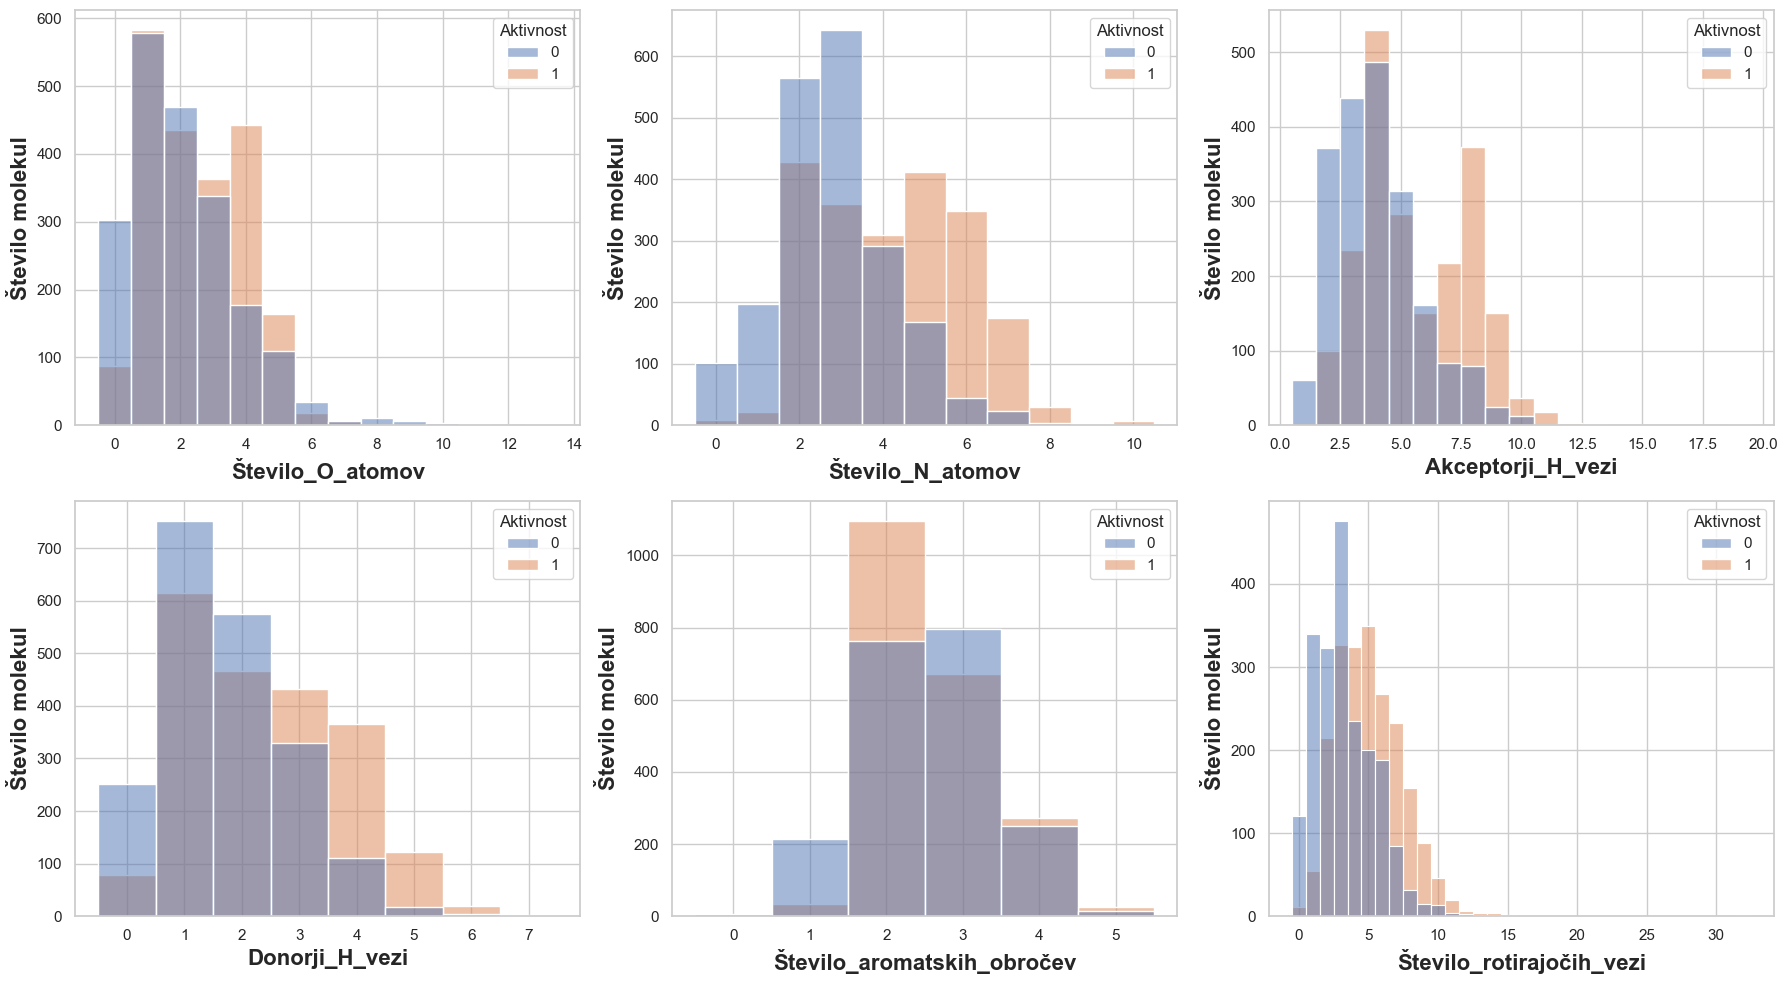

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Activity' is a column in the molecules_analysis DataFrame indicating active/inactive status
# List of discrete properties to visualize
discrete_properties = ['Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 'Donorji_H_vezi', 'Število_aromatskih_obročev', 'Število_rotirajočih_vezi']

# Create a figure with subplots for discrete properties
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each discrete property and create a histogram
for i, prop in enumerate(discrete_properties):
    sns.histplot(data=molecules_w_exclusions_analysis, x=prop, hue='Aktivnost', bins=molecules_w_exclusions_analysis[prop].nunique(), 
                 discrete=True, ax=axes[i]) #multiple="dodge"
    axes[i].set_xlabel(prop, fontsize=16, fontweight='bold')
    axes[i].set_ylabel('Število molekul', fontsize=16, fontweight='bold')
    #axes[i].set_title(f'Distribucija {prop}', fontsize=18, fontweight='bold')

# Remove any empty subplots if there are less than 6 properties
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for discrete properties
plt.tight_layout()
plt.show()
